# ABOUT THE DATASET

## DESCRIPTION
**ABC Bank wants to identify and understand their customers better to determine the appropriate credit amount to be offered based on multiple factors. The bank possesses a vast dataset containing customer information and other relevant parameters. The bank aims to develop a robust model that can accurately group customer based on their creditworthiness. This will enable the bank to make informed decisions about the credit amount to be extended to each customer group, which can help mitigate risk, ensure responsible lending practices, and optimize loan portfolio management. Additionally, the model can assist the bank in identifying potential high-value customers, tailoring credit offers based on risk profiles, and complying with regulatory requirements.

We have been given a percept of this dataset and the problem
at hand is to create a reliable model that can effectively categorize customers into three groups based on various factors, enabling the bank to make data-driven decisions for credit lending and risk management.**


---



### IMPORTING LIBRARIES AND DATASET

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
train=pd.read_csv("/content/ABC_Bank_train_data.csv")
test=pd.read_csv("/content/ABC_Bank_test_data.csv")

train.head()

,serial number,account_info,duration_month,credit_history,purpose,savings_account,employment_st,poi,personal_status,gurantors,...,property_type,age,installment_type,housing_type,credits_no,job_type,liables,telephone,foreigner,Group_no
0,1,A11,6,A34,A43,A65,A75,4.0,A93,A101,...,A121,67.0,A143,A152,2,A173,1,A192,A201,3
1,2,A12,48,A32,A43,A61,A73,2.0,A92,A101,...,A121,22.0,A143,A152,1,A173,1,A191,A201,1
2,3,A14,12,A34,A46,A61,A74,2.0,A93,A101,...,A121,49.0,A143,A152,1,A172,2,A191,A201,2
3,4,A11,42,A32,A42,A61,A74,2.0,A93,A103,...,A122,45.0,A143,A153,1,A173,2,A191,A201,1
4,5,A11,24,A33,A40,A61,A73,3.0,A93,A101,...,A124,53.0,A143,A153,2,A173,2,A191,A201,1


## PERFORMING EDA



In [ ]:
train.describe()

,serial number,duration_month,poi,resident_since,age,credits_no,liables,Group_no
count,800.0000,800.00000,788.000000,800.000000,796.000000,800.000000,800.000000,800.000000
mean,400.5000,20.65125,2.950508,2.841250,35.408291,1.396250,1.147500,2.076250
std,231.0844,12.15635,1.130084,1.106833,11.499101,0.569773,0.354825,0.744062
min,1.0000,4.00000,1.000000,1.000000,19.000000,1.000000,1.000000,1.000000
25%,200.7500,12.00000,2.000000,2.000000,27.000000,1.000000,1.000000,2.000000
50%,400.5000,18.00000,3.000000,3.000000,33.000000,1.000000,1.000000,2.000000
75%,600.2500,24.00000,4.000000,4.000000,41.000000,2.000000,1.000000,3.000000
max,800.0000,72.00000,4.000000,4.000000,75.000000,4.000000,2.000000,3.000000


In [ ]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 800 entries, 0 to 799
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   serial number     800 non-null    int64  
 1   account_info      800 non-null    object 
 2   duration_month    800 non-null    int64  
 3   credit_history    800 non-null    object 
 4   purpose           800 non-null    object 
 5   savings_account   800 non-null    object 
 6   employment_st     792 non-null    object 
 7   poi               788 non-null    float64
 8   personal_status   800 non-null    object 
 9   gurantors         792 non-null    object 
 10  resident_since    800 non-null    int64  
 11  property_type     800 non-null    object 
 12  age               796 non-null    float64
 13  installment_type  800 non-null    object 
 14  housing_type      793 non-null    object 
 15  credits_no        800 non-null    int64  
 16  job_type          800 non-null    object 
 1

#### CHECKING FOR NULL VALUES

In [ ]:
train.isna().sum()

serial number        0
account_info         0
duration_month       0
credit_history       0
purpose              0
savings_account      0
employment_st        8
poi                 12
personal_status      0
gurantors            8
resident_since       0
property_type        0
age                  4
installment_type     0
housing_type         7
credits_no           0
job_type             0
liables              0
telephone            0
foreigner            0
Group_no             0
dtype: int64

**THERE ARE NULL VALUES PRESENT IN OUR DATASET**

<Axes: >

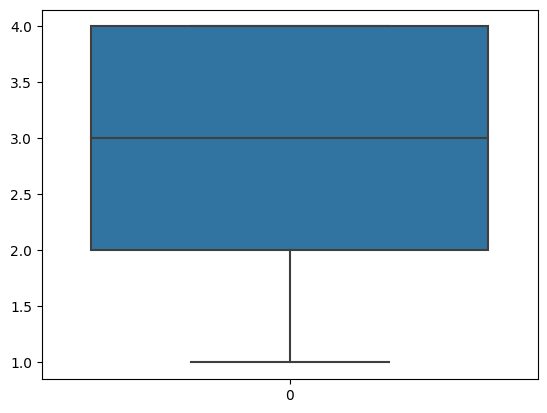

In [ ]:
sns.boxplot(train["poi"])

*PLOTTING BOXPLOT TO CHECK FOR OUTLIERS -> IF OUTLIERS ARE PRESENT WE CAN USE MEDIAN TO FILL NULL VALUES OR ELSE WE CAN USE MEAN TO FILL NA VALUES.*

**FROM THE ABOVE PLOT, WE CAN CONCLUDE THAT THERE ARE NO OUTLIERS PRESENT.**

In [ ]:
def fill_na(train):
  for i in train.columns:
    if train[i].dtype=="object":
      train[i]=np.where(train[i].isna(),train[i].mode(),train[i])
    else:
      train[i]=np.where(train[i].isna(),train[i].mean(skipna=True),train[i])
  return train


In [ ]:
fill_na(train)

,serial number,account_info,duration_month,credit_history,purpose,savings_account,employment_st,poi,personal_status,gurantors,...,property_type,age,installment_type,housing_type,credits_no,job_type,liables,telephone,foreigner,Group_no
0,1.0,A11,6.0,A34,A43,A65,A75,4.0,A93,A101,...,A121,67.0,A143,A152,2.0,A173,1.0,A192,A201,3.0
1,2.0,A12,48.0,A32,A43,A61,A73,2.0,A92,A101,...,A121,22.0,A143,A152,1.0,A173,1.0,A191,A201,1.0
2,3.0,A14,12.0,A34,A46,A61,A74,2.0,A93,A101,...,A121,49.0,A143,A152,1.0,A172,2.0,A191,A201,2.0
3,4.0,A11,42.0,A32,A42,A61,A74,2.0,A93,A103,...,A122,45.0,A143,A153,1.0,A173,2.0,A191,A201,1.0
4,5.0,A11,24.0,A33,A40,A61,A73,3.0,A93,A101,...,A124,53.0,A143,A153,2.0,A173,2.0,A191,A201,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
795,796.0,A14,9.0,A32,A42,A62,A72,2.0,A92,A101,...,A122,22.0,A143,A151,1.0,A173,1.0,A191,A201,2.0
796,797.0,A11,18.0,A32,A41,A65,A75,1.0,A93,A101,...,A122,51.0,A143,A153,1.0,A173,2.0,A192,A201,1.0
797,798.0,A14,12.0,A34,A42,A61,A72,2.0,A92,A101,...,A122,22.0,A143,A151,2.0,A172,1.0,A191,A201,3.0
798,799.0,A14,24.0,A33,A40,A65,A75,4.0,A94,A101,...,A123,54.0,A143,A152,2.0,A173,1.0,A192,A201,3.0


In [ ]:
train.isna().sum()

serial number       0
account_info        0
duration_month      0
credit_history      0
purpose             0
savings_account     0
employment_st       0
poi                 0
personal_status     0
gurantors           0
resident_since      0
property_type       0
age                 0
installment_type    0
housing_type        0
credits_no          0
job_type            0
liables             0
telephone           0
foreigner           0
Group_no            0
dtype: int64

In [ ]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 800 entries, 0 to 799
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   serial number     800 non-null    float64
 1   account_info      800 non-null    object 
 2   duration_month    800 non-null    float64
 3   credit_history    800 non-null    object 
 4   purpose           800 non-null    object 
 5   savings_account   800 non-null    object 
 6   employment_st     800 non-null    object 
 7   poi               800 non-null    float64
 8   personal_status   800 non-null    object 
 9   gurantors         800 non-null    object 
 10  resident_since    800 non-null    float64
 11  property_type     800 non-null    object 
 12  age               800 non-null    float64
 13  installment_type  800 non-null    object 
 14  housing_type      800 non-null    object 
 15  credits_no        800 non-null    float64
 16  job_type          800 non-null    object 
 1

#### DROPPING UNNECESSARY COLUMNS

In [ ]:
train.drop("serial number",axis=1,inplace=True)

In [ ]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 800 entries, 0 to 799
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   account_info      800 non-null    object 
 1   duration_month    800 non-null    float64
 2   credit_history    800 non-null    object 
 3   purpose           800 non-null    object 
 4   savings_account   800 non-null    object 
 5   employment_st     800 non-null    object 
 6   poi               800 non-null    float64
 7   personal_status   800 non-null    object 
 8   gurantors         800 non-null    object 
 9   resident_since    800 non-null    float64
 10  property_type     800 non-null    object 
 11  age               800 non-null    float64
 12  installment_type  800 non-null    object 
 13  housing_type      800 non-null    object 
 14  credits_no        800 non-null    float64
 15  job_type          800 non-null    object 
 16  liables           800 non-null    float64
 1

#### DATA VISUALIZATION

array([[<Axes: title={'center': 'duration_month'}>,
        <Axes: title={'center': 'poi'}>,
        <Axes: title={'center': 'resident_since'}>],
       [<Axes: title={'center': 'age'}>,
        <Axes: title={'center': 'credits_no'}>,
        <Axes: title={'center': 'liables'}>],
       [<Axes: title={'center': 'Group_no'}>, <Axes: >, <Axes: >]],
      dtype=object)

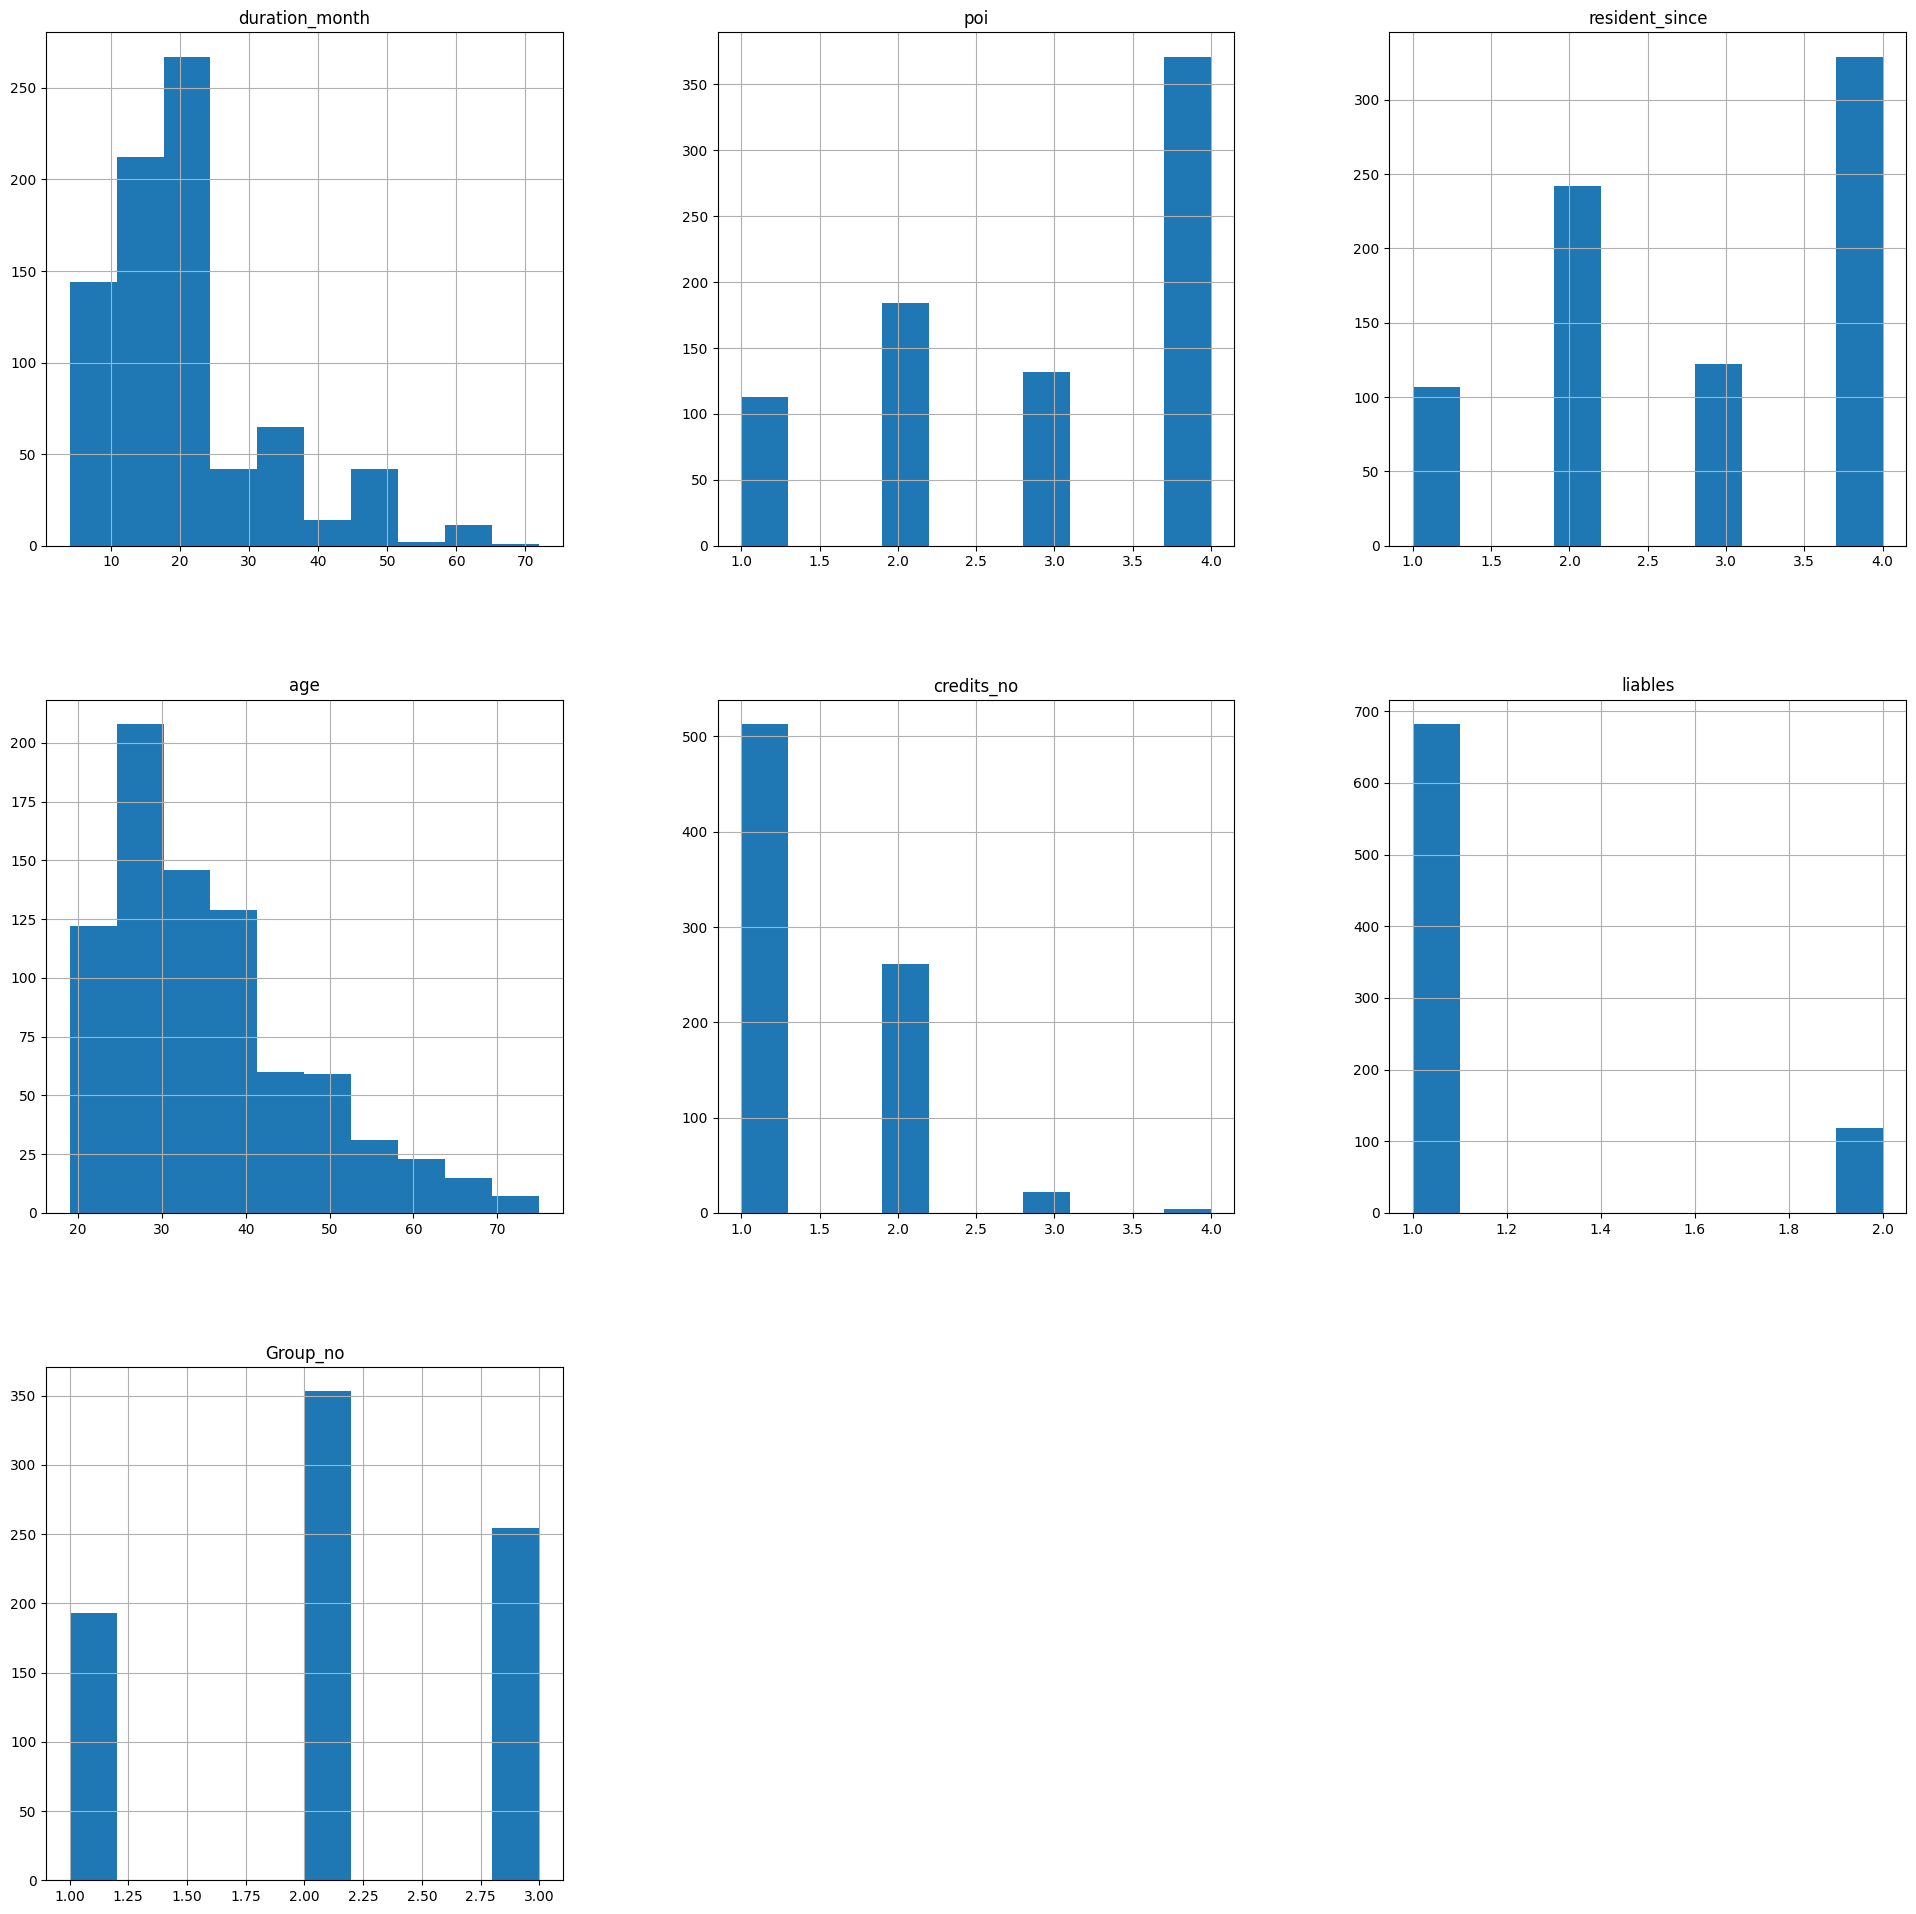

In [ ]:
train.hist(figsize=(24,24))

<Axes: >

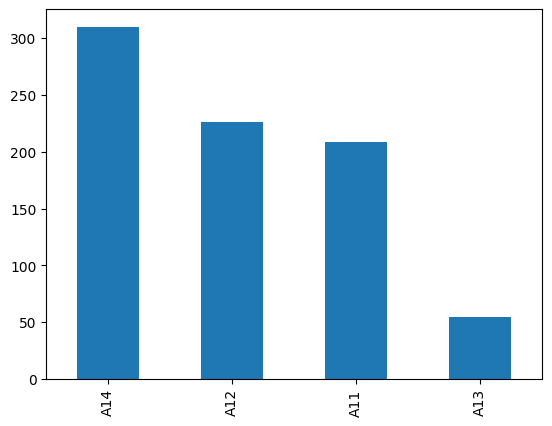

In [ ]:
train["account_info"].value_counts().plot(kind="bar")

1.   A11 signifies 0 (excluding 0) or lesser amount credited to current checking account. (Amounts are in units of certain currency)
2.   A12 signifies greater than 0 (including 0) and lesser than 200 (excluding 200) units of currency
3.   A13 signifies amount greater than 200 (including 200) being recorded in the account
4.   A14 signifies no account details provided





**ACCOUNT A14 HAS THE HIGHEST COUNTS.**

<Axes: ylabel='employment_st'>

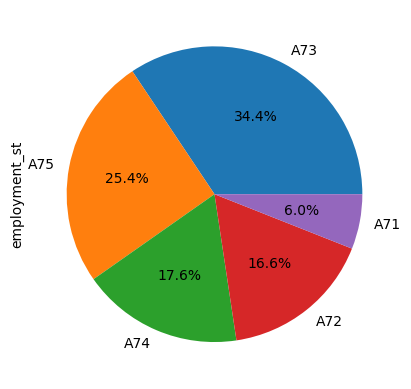

In [ ]:
train["employment_st"].value_counts().plot(kind="pie",autopct='%1.1f%%')



*  A71 signifies that the individual is unemployed

*   A72 signifies that the individual has been employed for less than a year
*   A73 signifies that the individual has been employed for more than a year but less than four years


* A74 signifies that the individual has been employed more than four years but less than seven years


*  A75 signifies that the individual has been employed for more than seven years






**A73 HAS THE HIGHEST COUNT AMOUNG ALL OTHER STATUSES.**

<Axes: ylabel='duration_month'>

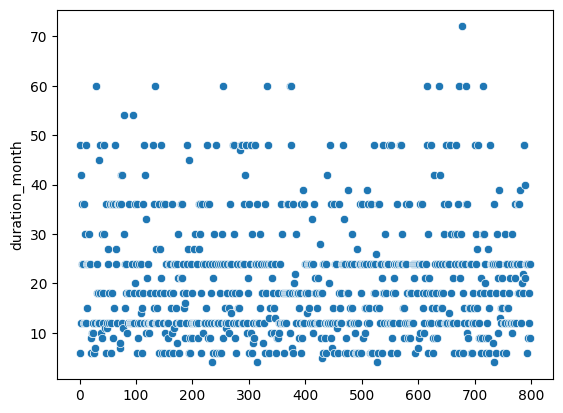

In [ ]:
sns.scatterplot(train["duration_month"])

<Axes: >

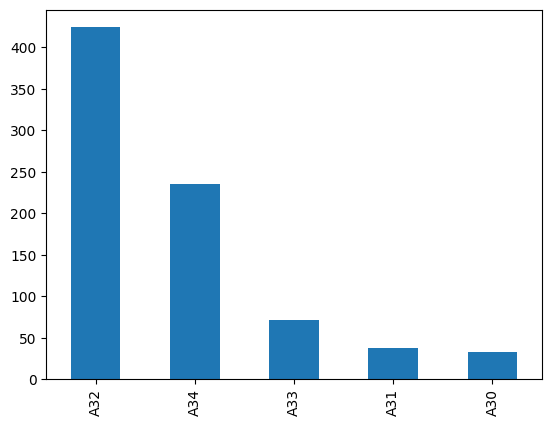

In [ ]:
train["credit_history"].value_counts().plot(kind="bar")









*   A30 signifies that no previous loans has been taken or all loans taken have been payed back.

*   A31 signifies that all loans from the current bank has been payed off. Loan information of other banks are not available.

*   A32 signifies loan exists but till now regular installments have been payed back in full amount.
*   A33  signifies that significant delays have been seen in repayment of loan installments.


*  A34 signifies other loans exist at the same bank. Irregular behaviour in repayment.






**A32 HAS THE HIGHEST VALUE COUNTS WHILE THEA30 HAS THE LOWEST VALUE COUNTS.**

<Axes: >

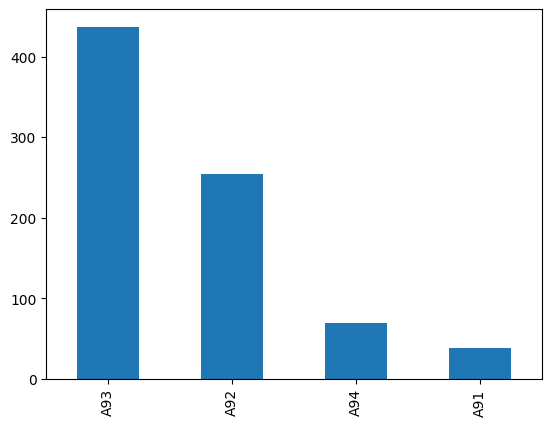

In [ ]:
train["personal_status"].value_counts().plot(kind="bar")







*  A91 signifies that the individual is a separated or divorced male

*   A92 signifies female individuals who are separated or divorced
*   A93 signifies unmarried males


*   A94 signifies married or widowed males

* A95 signifies single females






**DIVORCED MALES ARE THE HIGHEST NUMBER OF ACCOUNT HOLDERS IN THE BANK.**

<Axes: >

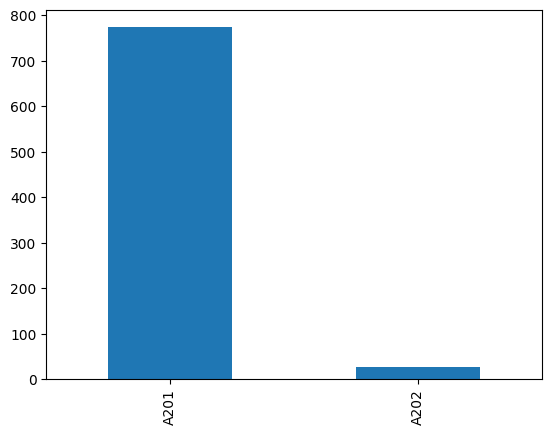

In [ ]:
train["foreigner"].value_counts().plot(kind='bar')

<Axes: >

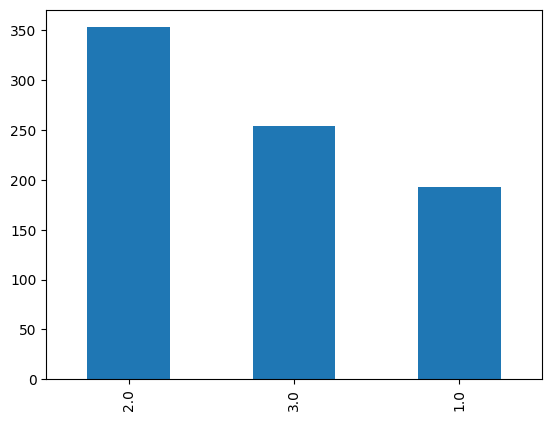

In [ ]:
train["Group_no"].value_counts().plot(kind='bar')

<Axes: xlabel='age', ylabel='poi'>

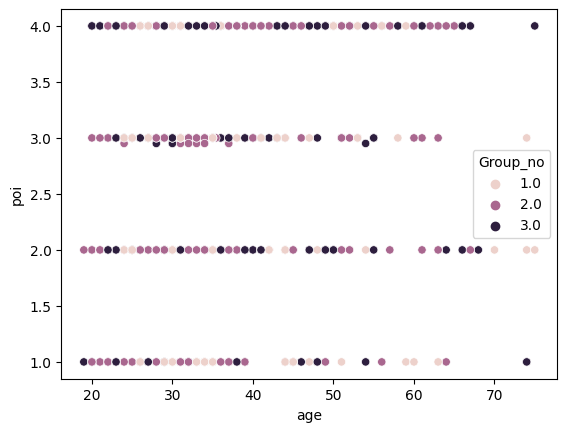

In [ ]:
sns.scatterplot(x=train["age"],y=train["poi"],hue=train["Group_no"],data=train)

<Axes: xlabel='credit_history', ylabel='Group_no'>

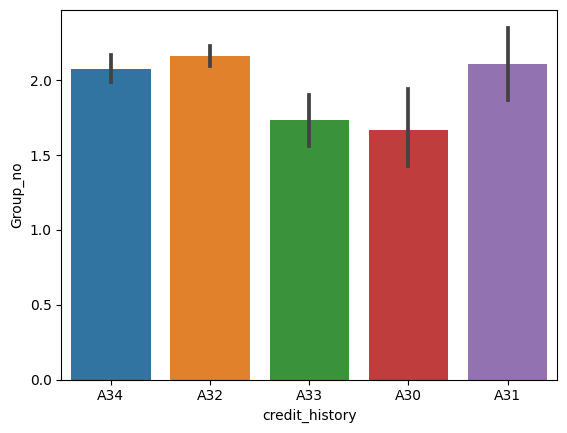

In [ ]:
sns.barplot(x=train["credit_history"],y=train["Group_no"])

<Axes: xlabel='poi', ylabel='Group_no'>

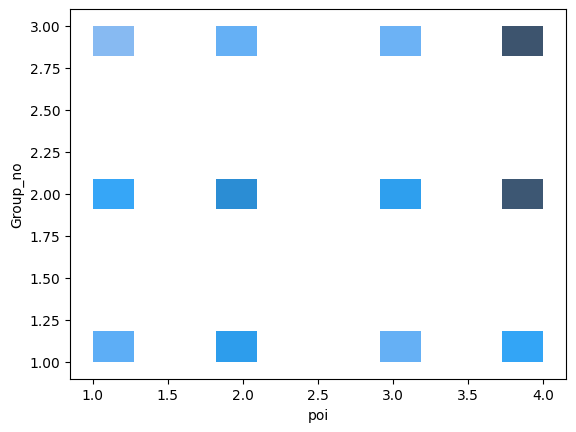

In [ ]:
sns.histplot(x=train["poi"],y=train["Group_no"])

<ipython-input-26-8ae1bc75c7f8>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(train.corr(),annot=True)


<Axes: >

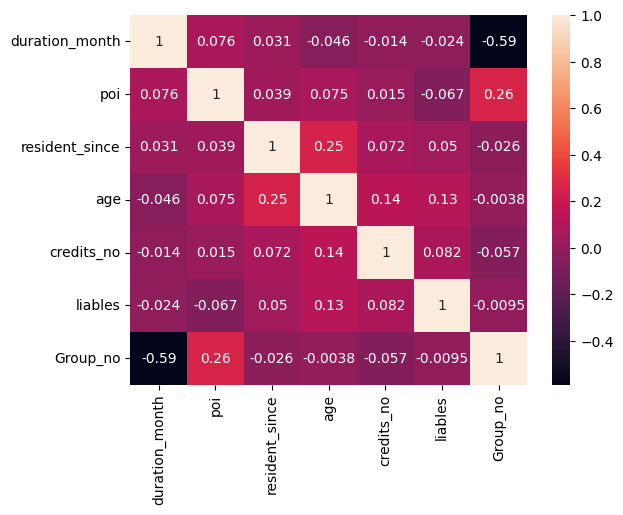

In [ ]:
sns.heatmap(train.corr(),annot=True)

#### ENCODING

In [ ]:
a=train.select_dtypes(object).columns
train_enc=pd.get_dummies(train,columns=a)

In [ ]:
train_enc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 800 entries, 0 to 799
Data columns (total 61 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   duration_month         800 non-null    float64
 1   poi                    800 non-null    float64
 2   resident_since         800 non-null    float64
 3   age                    800 non-null    float64
 4   credits_no             800 non-null    float64
 5   liables                800 non-null    float64
 6   Group_no               800 non-null    float64
 7   account_info_A11       800 non-null    uint8  
 8   account_info_A12       800 non-null    uint8  
 9   account_info_A13       800 non-null    uint8  
 10  account_info_A14       800 non-null    uint8  
 11  credit_history_A30     800 non-null    uint8  
 12  credit_history_A31     800 non-null    uint8  
 13  credit_history_A32     800 non-null    uint8  
 14  credit_history_A33     800 non-null    uint8  
 15  credit

## SPLITTING THE DATASET

In [ ]:
x=train_enc.drop("Group_no",axis=1)

In [ ]:
y=train_enc.loc[:,"Group_no"]

#### SPLITTING THE DATA INTO TRAIN AND TEST SETS

In [ ]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=5)

#### FEATURE SCALING

In [ ]:
# from sklearn.preprocessing import StandardScaler
# ss=StandardScaler()
# x_train=ss.fit_transform(x_train)
# x_test=ss.transform(x_test)

#### ACCURACY RESULT

In [ ]:
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix

def report(x,y):
  print("Accuracy Score : ",accuracy_score(x,y))
  print("Confusion Matrix : ",confusion_matrix(x,y))
  print("CLassification Report : ",classification_report(x,y))

## APPLYING LOGISTIC REGRESSION

In [ ]:
from sklearn.linear_model import LogisticRegression
lr=LogisticRegression()
lr.fit(x_train,y_train)


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [ ]:
ypred_train_lr=lr.predict(x_train)
ypred_test_lr=lr.predict(x_test)

#### ACCURACY SCORE

In [ ]:
report(y_train,ypred_train_lr)

Accuracy Score :  0.7410714285714286
Confusion Matrix :  [[100  33   2]
 [ 24 179  43]
 [  1  42 136]]
CLassification Report :                precision    recall  f1-score   support

         1.0       0.80      0.74      0.77       135
         2.0       0.70      0.73      0.72       246
         3.0       0.75      0.76      0.76       179

    accuracy                           0.74       560
   macro avg       0.75      0.74      0.75       560
weighted avg       0.74      0.74      0.74       560



In [ ]:
report(y_test,ypred_test_lr)

Accuracy Score :  0.6666666666666666
Confusion Matrix :  [[36 21  1]
 [14 68 25]
 [ 1 18 56]]
CLassification Report :                precision    recall  f1-score   support

         1.0       0.71      0.62      0.66        58
         2.0       0.64      0.64      0.64       107
         3.0       0.68      0.75      0.71        75

    accuracy                           0.67       240
   macro avg       0.67      0.67      0.67       240
weighted avg       0.67      0.67      0.67       240



## APPLYING DECISION TREE

### RANDOMIZED SEARCH CV

In [ ]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.tree import DecisionTreeClassifier
dtc=DecisionTreeClassifier()
splitter=['best', 'random']
max_features=['auto','sqrt','log2']
max_depth=[int(x) for x in np.linspace(100,1000,10)]
min_samples_split=[2,5,10,14]
min_samples_leaf=[1,2,4,6,8]
criterion=['gini','entropy']

random_grid_dtc={'splitter':splitter,
             'max_features':max_features,
             'max_depth':max_depth,
             'min_samples_split':min_samples_split,
             'min_samples_leaf':min_samples_leaf,
             'criterion':criterion
}
print(random_grid_dtc)

{'splitter': ['best', 'random'], 'max_features': ['auto', 'sqrt', 'log2'], 'max_depth': [100, 200, 300, 400, 500, 600, 700, 800, 900, 1000], 'min_samples_split': [2, 5, 10, 14], 'min_samples_leaf': [1, 2, 4, 6, 8], 'criterion': ['gini', 'entropy']}


In [ ]:
random_dtc=RandomizedSearchCV(estimator=dtc,param_distributions=random_grid_dtc,n_iter=100,cv=3,verbose=2,random_state=100,n_jobs=-1)
random_dtc.fit(x_train,y_train)

Fitting 3 folds for each of 100 candidates, totalling 300 fits


RandomizedSearchCV(cv=3, estimator=DecisionTreeClassifier(), n_iter=100,
                   n_jobs=-1,
                   param_distributions={'criterion': ['gini', 'entropy'],
                                        'max_depth': [100, 200, 300, 400, 500,
                                                      600, 700, 800, 900,
                                                      1000],
                                        'max_features': ['auto', 'sqrt',
                                                         'log2'],
                                        'min_samples_leaf': [1, 2, 4, 6, 8],
                                        'min_samples_split': [2, 5, 10, 14],
                                        'splitter': ['best', 'random']},
                   random_state=100, verbose=2)

In [ ]:
best_grid_dtc=random_dtc.best_estimator_

In [ ]:
ypred_train_dtc=best_grid_dtc.predict(x_train)
ypred_test_dtc=best_grid_dtc.predict(x_test)

### GRID SEARCH CV

In [ ]:
from sklearn.model_selection import GridSearchCV

In [ ]:
param_grid_dtc = {
    'splitter':[random_dtc.best_params_["splitter"]],
    'criterion': [random_dtc.best_params_['criterion']],
    'max_depth': [random_dtc.best_params_['max_depth']],
    'max_features': [random_dtc.best_params_['max_features']],
    'min_samples_leaf': [random_dtc.best_params_['min_samples_leaf'], 
                         random_dtc.best_params_['min_samples_leaf']+2, 
                         random_dtc.best_params_['min_samples_leaf'] + 4],
    'min_samples_split': [random_dtc.best_params_['min_samples_split'] - 2,
                          random_dtc.best_params_['min_samples_split'] - 1,
                          random_dtc.best_params_['min_samples_split'], 
                          random_dtc.best_params_['min_samples_split'] +1,
                          random_dtc.best_params_['min_samples_split'] + 2],
}


In [ ]:
grid_search_dtc=GridSearchCV(estimator=dtc,param_grid=param_grid_dtc,cv=10,n_jobs=-1,verbose=2)
grid_search_dtc.fit(x_train,y_train)

Fitting 10 folds for each of 15 candidates, totalling 150 fits


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:378: FitFailedWarning: 
60 fits failed out of a total of 150.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
30 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py", line 889, in fit
    super().fit(
  File "/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py", line 177, in fit
    self._validate_params()
  File "/usr/local/lib/python3.10/dist-packages/sklearn/base.py", line 600, in _valida

GridSearchCV(cv=10, estimator=DecisionTreeClassifier(), n_jobs=-1,
             param_grid={'criterion': ['entropy'], 'max_depth': [700],
                         'max_features': ['sqrt'],
                         'min_samples_leaf': [4, 6, 8],
                         'min_samples_split': [0, 1, 2, 3, 4],
                         'splitter': ['best']},
             verbose=2)

In [ ]:
best_grid_dtc=grid_search_dtc.best_estimator_

In [ ]:
ypred_train_dfc=best_grid_dtc.predict(x_train)
ypred_test_dfc=best_grid_dtc.predict(x_test)

### ACCURACY SCORE

In [ ]:
report(y_train,ypred_train_dfc)

Accuracy Score :  0.6589285714285714
Confusion Matrix :  [[ 85  38  12]
 [ 30 180  36]
 [ 15  60 104]]
CLassification Report :                precision    recall  f1-score   support

         1.0       0.65      0.63      0.64       135
         2.0       0.65      0.73      0.69       246
         3.0       0.68      0.58      0.63       179

    accuracy                           0.66       560
   macro avg       0.66      0.65      0.65       560
weighted avg       0.66      0.66      0.66       560



In [ ]:
report(y_test,ypred_test_dfc)

Accuracy Score :  0.5458333333333333
Confusion Matrix :  [[28 24  6]
 [25 67 15]
 [ 6 33 36]]
CLassification Report :                precision    recall  f1-score   support

         1.0       0.47      0.48      0.48        58
         2.0       0.54      0.63      0.58       107
         3.0       0.63      0.48      0.55        75

    accuracy                           0.55       240
   macro avg       0.55      0.53      0.53       240
weighted avg       0.55      0.55      0.54       240



## APPLYING RANDOM FOREST

#### RANDOMIZED SEARCH CV

In [ ]:
from sklearn.ensemble import RandomForestClassifier
rfc=RandomForestClassifier()

n_estimators=[int(x) for x in np.linspace(200,2000,100)]
max_features=['auto','sqrt','log2']
max_depth=[int(x) for x in np.linspace(100,1000,10)]
min_samples_split=[2,5,10,14]
min_samples_leaf=[1,2,4,6,8]
criterion=['gini','entropy']

random_grid={'n_estimators':n_estimators,
             'max_features':max_features,
             'max_depth':max_depth,
             'min_samples_split':min_samples_split,
             'min_samples_leaf':min_samples_leaf,
             'criterion':criterion
}
print(random_grid)

{'n_estimators': [200, 218, 236, 254, 272, 290, 309, 327, 345, 363, 381, 400, 418, 436, 454, 472, 490, 509, 527, 545, 563, 581, 600, 618, 636, 654, 672, 690, 709, 727, 745, 763, 781, 800, 818, 836, 854, 872, 890, 909, 927, 945, 963, 981, 1000, 1018, 1036, 1054, 1072, 1090, 1109, 1127, 1145, 1163, 1181, 1200, 1218, 1236, 1254, 1272, 1290, 1309, 1327, 1345, 1363, 1381, 1400, 1418, 1436, 1454, 1472, 1490, 1509, 1527, 1545, 1563, 1581, 1600, 1618, 1636, 1654, 1672, 1690, 1709, 1727, 1745, 1763, 1781, 1800, 1818, 1836, 1854, 1872, 1890, 1909, 1927, 1945, 1963, 1981, 2000], 'max_features': ['auto', 'sqrt', 'log2'], 'max_depth': [100, 200, 300, 400, 500, 600, 700, 800, 900, 1000], 'min_samples_split': [2, 5, 10, 14], 'min_samples_leaf': [1, 2, 4, 6, 8], 'criterion': ['gini', 'entropy']}


In [ ]:
random_rfc=RandomizedSearchCV(estimator=rfc,param_distributions=random_grid,n_iter=100,cv=3,verbose=2,random_state=100,n_jobs=-1)
random_rfc.fit(x_train,y_train)

Fitting 3 folds for each of 100 candidates, totalling 300 fits


RandomizedSearchCV(cv=3, estimator=RandomForestClassifier(), n_iter=100,
                   n_jobs=-1,
                   param_distributions={'criterion': ['gini', 'entropy'],
                                        'max_depth': [100, 200, 300, 400, 500,
                                                      600, 700, 800, 900,
                                                      1000],
                                        'max_features': ['auto', 'sqrt',
                                                         'log2'],
                                        'min_samples_leaf': [1, 2, 4, 6, 8],
                                        'min_samples_split': [2, 5, 10, 14],
                                        'n_estimators': [200, 218, 236, 254,
                                                         272, 290, 309, 327,
                                                         345, 363, 381, 400,
                                                         418, 436, 454, 472,
                                                         490, 509, 527, 545,
                                                         563, 581, 600, 618,
                                                         636, 654, 672, 690,
                                                         709, 727, ...]},
                   random_state=100, verbose=2)

In [ ]:
random_rfc.best_params_

{'n_estimators': 654,
 'min_samples_split': 14,
 'min_samples_leaf': 6,
 'max_features': 'sqrt',
 'max_depth': 800,
 'criterion': 'entropy'}

#### GRID SEARCH CV

In [ ]:
best_random_grid=random_rfc.best_estimator_

In [ ]:
param_grid = {
    'criterion': [random_rfc.best_params_['criterion']],
    'max_depth': [random_rfc.best_params_['max_depth']],
    'max_features': [random_rfc.best_params_['max_features']],
    'min_samples_leaf': [random_rfc.best_params_['min_samples_leaf'], 
                         random_rfc.best_params_['min_samples_leaf']+2, 
                         random_rfc.best_params_['min_samples_leaf'] + 4],
    'min_samples_split': [random_rfc.best_params_['min_samples_split'] - 2,
                          random_rfc.best_params_['min_samples_split'] - 1,
                          random_rfc.best_params_['min_samples_split'], 
                          random_rfc.best_params_['min_samples_split'] +1,
                          random_rfc.best_params_['min_samples_split'] + 2],
    'n_estimators': [random_rfc.best_params_['n_estimators'] - 200, random_rfc.best_params_['n_estimators'] - 100, 
                     random_rfc.best_params_['n_estimators'], 
                     random_rfc.best_params_['n_estimators'] + 100, random_rfc.best_params_['n_estimators'] + 200]
}

print(param_grid)

{'criterion': ['entropy'], 'max_depth': [800], 'max_features': ['sqrt'], 'min_samples_leaf': [6, 8, 10], 'min_samples_split': [12, 13, 14, 15, 16], 'n_estimators': [454, 554, 654, 754, 854]}


In [ ]:
grid_search=GridSearchCV(estimator=rfc,param_grid=param_grid,cv=10,n_jobs=-1,verbose=2)
grid_search.fit(x_train,y_train)

Fitting 10 folds for each of 75 candidates, totalling 750 fits


GridSearchCV(cv=10, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'criterion': ['entropy'], 'max_depth': [800],
                         'max_features': ['sqrt'],
                         'min_samples_leaf': [6, 8, 10],
                         'min_samples_split': [12, 13, 14, 15, 16],
                         'n_estimators': [454, 554, 654, 754, 854]},
             verbose=2)

In [ ]:
best_grid=grid_search.best_estimator_

In [ ]:
ypred_train_rfc=best_grid.predict(x_train)
ypred_test_rfc=best_grid.predict(x_test)

#### ACCURACY SCORE

In [ ]:
report(y_train,ypred_train_rfc)

Accuracy Score :  0.7785714285714286
Confusion Matrix :  [[ 93  42   0]
 [ 11 216  19]
 [  0  52 127]]
CLassification Report :                precision    recall  f1-score   support

         1.0       0.89      0.69      0.78       135
         2.0       0.70      0.88      0.78       246
         3.0       0.87      0.71      0.78       179

    accuracy                           0.78       560
   macro avg       0.82      0.76      0.78       560
weighted avg       0.80      0.78      0.78       560



In [ ]:
report(y_test,ypred_test_rfc)

Accuracy Score :  0.6041666666666666
Confusion Matrix :  [[22 35  1]
 [ 7 81 19]
 [ 3 30 42]]
CLassification Report :                precision    recall  f1-score   support

         1.0       0.69      0.38      0.49        58
         2.0       0.55      0.76      0.64       107
         3.0       0.68      0.56      0.61        75

    accuracy                           0.60       240
   macro avg       0.64      0.57      0.58       240
weighted avg       0.63      0.60      0.60       240



## APPLYING KNN

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier(n_neighbors=41)
knn.fit(x_train,y_train)


KNeighborsClassifier(n_neighbors=41)

In [ ]:
ypred_knn_train=knn.predict(x_train)
ypred_knn_test=knn.predict(x_test)

#### ACCURACY SCORE

In [ ]:
report(y_train,ypred_knn_train)

Accuracy Score :  0.6160714285714286
Confusion Matrix :  [[ 70  57   8]
 [ 27 142  77]
 [  1  45 133]]
CLassification Report :                precision    recall  f1-score   support

         1.0       0.71      0.52      0.60       135
         2.0       0.58      0.58      0.58       246
         3.0       0.61      0.74      0.67       179

    accuracy                           0.62       560
   macro avg       0.64      0.61      0.62       560
weighted avg       0.62      0.62      0.61       560



In [ ]:
report(y_test,ypred_knn_test)

Accuracy Score :  0.5541666666666667
Confusion Matrix :  [[22 29  7]
 [ 8 60 39]
 [ 0 24 51]]
CLassification Report :                precision    recall  f1-score   support

         1.0       0.73      0.38      0.50        58
         2.0       0.53      0.56      0.55       107
         3.0       0.53      0.68      0.59        75

    accuracy                           0.55       240
   macro avg       0.60      0.54      0.55       240
weighted avg       0.58      0.55      0.55       240



##SVC

In [ ]:
from sklearn.svm import SVC
svc=SVC(kernel='rbf',C=1)
svc.fit(x_train,y_train)

SVC(C=1)

In [ ]:
ypred_train_svc=svc.predict(x_train)
ypred_test_svc=svc.predict(x_test)

#### ACCURACY SCORE

In [ ]:
report(y_train,ypred_train_svc)

Accuracy Score :  0.6178571428571429
Confusion Matrix :  [[ 55  72   8]
 [ 12 151  83]
 [  0  39 140]]
CLassification Report :                precision    recall  f1-score   support

         1.0       0.82      0.41      0.54       135
         2.0       0.58      0.61      0.59       246
         3.0       0.61      0.78      0.68       179

    accuracy                           0.62       560
   macro avg       0.67      0.60      0.61       560
weighted avg       0.64      0.62      0.61       560



In [ ]:
report(y_test,ypred_test_svc)

Accuracy Score :  0.5625
Confusion Matrix :  [[19 32  7]
 [ 2 61 44]
 [ 0 20 55]]
CLassification Report :                precision    recall  f1-score   support

         1.0       0.90      0.33      0.48        58
         2.0       0.54      0.57      0.55       107
         3.0       0.52      0.73      0.61        75

    accuracy                           0.56       240
   macro avg       0.65      0.54      0.55       240
weighted avg       0.62      0.56      0.55       240



##NAIVE BAYES


In [ ]:
from sklearn.naive_bayes import GaussianNB
nb=GaussianNB()
nb.fit(x_train,y_train)

GaussianNB()

In [ ]:
ypred_train_nb=nb.predict(x_train)
ypred_test_nb=nb.predict(x_test)

### ACCURACY SCORE


In [ ]:
report(y_train,ypred_train_nb)

Accuracy Score :  0.4375
Confusion Matrix :  [[128   6   1]
 [174  53  19]
 [ 93  22  64]]
CLassification Report :                precision    recall  f1-score   support

         1.0       0.32      0.95      0.48       135
         2.0       0.65      0.22      0.32       246
         3.0       0.76      0.36      0.49       179

    accuracy                           0.44       560
   macro avg       0.58      0.51      0.43       560
weighted avg       0.61      0.44      0.41       560



In [ ]:
report(y_test,ypred_test_nb)

Accuracy Score :  0.375
Confusion Matrix :  [[49  7  2]
 [73 15 19]
 [38 11 26]]
CLassification Report :                precision    recall  f1-score   support

         1.0       0.31      0.84      0.45        58
         2.0       0.45      0.14      0.21       107
         3.0       0.55      0.35      0.43        75

    accuracy                           0.38       240
   macro avg       0.44      0.44      0.36       240
weighted avg       0.45      0.38      0.34       240



## APPLYING SMOTE

In [ ]:
from imblearn.over_sampling import SMOTE
smp=SMOTE()


In [ ]:
x_smote,y_smote=smp.fit_resample(x,y)

In [ ]:
x_sm_train,x_sm_test,y_sm_train,y_sm_test=train_test_split(x_smote,y_smote,test_size=0.2,random_state=2)

### LOGISTIC REGRESSION

In [ ]:
lr.fit(x_sm_train,y_sm_train) 

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [ ]:
y_pred_lr_train_sm=lr.predict(x_sm_train)
y_pred_lr_test_sm=lr.predict(x_sm_test)

In [ ]:
report(y_sm_train,y_pred_lr_train_sm)

Accuracy Score :  0.7863046044864227
Confusion Matrix :  [[236  38   6]
 [ 30 206  48]
 [  5  54 224]]
CLassification Report :                precision    recall  f1-score   support

         1.0       0.87      0.84      0.86       280
         2.0       0.69      0.73      0.71       284
         3.0       0.81      0.79      0.80       283

    accuracy                           0.79       847
   macro avg       0.79      0.79      0.79       847
weighted avg       0.79      0.79      0.79       847



In [ ]:
report(y_sm_test,y_pred_lr_test_sm)

Accuracy Score :  0.7358490566037735
Confusion Matrix :  [[57 12  4]
 [17 41 11]
 [ 1 11 58]]
CLassification Report :                precision    recall  f1-score   support

         1.0       0.76      0.78      0.77        73
         2.0       0.64      0.59      0.62        69
         3.0       0.79      0.83      0.81        70

    accuracy                           0.74       212
   macro avg       0.73      0.73      0.73       212
weighted avg       0.73      0.74      0.73       212



### DECISION TREE

In [ ]:
grid_search_dtc.fit(x_sm_train,y_sm_train)

Fitting 10 folds for each of 15 candidates, totalling 150 fits


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:378: FitFailedWarning: 
60 fits failed out of a total of 150.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
30 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py", line 889, in fit
    super().fit(
  File "/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py", line 177, in fit
    self._validate_params()
  File "/usr/local/lib/python3.10/dist-packages/sklearn/base.py", line 600, in _valida

GridSearchCV(cv=10, estimator=DecisionTreeClassifier(), n_jobs=-1,
             param_grid={'criterion': ['entropy'], 'max_depth': [700],
                         'max_features': ['sqrt'],
                         'min_samples_leaf': [4, 6, 8],
                         'min_samples_split': [0, 1, 2, 3, 4],
                         'splitter': ['best']},
             verbose=2)

In [ ]:
ypred_train_dtc_sm=best_grid_dtc.predict(x_sm_train)
ypred_test_dtc_sm=best_grid_dtc.predict(x_sm_test)

In [ ]:
report(y_sm_train,ypred_train_dtc_sm)

Accuracy Score :  0.5785123966942148
Confusion Matrix :  [[151  98  31]
 [ 41 201  42]
 [ 21 124 138]]
CLassification Report :                precision    recall  f1-score   support

         1.0       0.71      0.54      0.61       280
         2.0       0.48      0.71      0.57       284
         3.0       0.65      0.49      0.56       283

    accuracy                           0.58       847
   macro avg       0.61      0.58      0.58       847
weighted avg       0.61      0.58      0.58       847



In [ ]:
report(y_sm_test,ypred_test_dtc_sm)

Accuracy Score :  0.589622641509434
Confusion Matrix :  [[44 21  8]
 [14 46  9]
 [ 4 31 35]]
CLassification Report :                precision    recall  f1-score   support

         1.0       0.71      0.60      0.65        73
         2.0       0.47      0.67      0.55        69
         3.0       0.67      0.50      0.57        70

    accuracy                           0.59       212
   macro avg       0.62      0.59      0.59       212
weighted avg       0.62      0.59      0.59       212



### RANDOM FOREST

In [ ]:
grid_search.fit(x_sm_train,y_sm_train)

Fitting 10 folds for each of 75 candidates, totalling 750 fits


GridSearchCV(cv=10, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'criterion': ['entropy'], 'max_depth': [800],
                         'max_features': ['sqrt'],
                         'min_samples_leaf': [6, 8, 10],
                         'min_samples_split': [12, 13, 14, 15, 16],
                         'n_estimators': [454, 554, 654, 754, 854]},
             verbose=2)

In [ ]:
best_grid_sm=grid_search.best_estimator_

In [ ]:
ypred_train_rfc_sm=best_grid_sm.predict(x_sm_train)
ypred_test_rfc_sm=best_grid_sm.predict(x_sm_test)

In [ ]:
report(y_sm_train,ypred_train_rfc_sm)

Accuracy Score :  0.8866587957497049
Confusion Matrix :  [[258  17   5]
 [ 21 235  28]
 [  3  22 258]]
CLassification Report :                precision    recall  f1-score   support

         1.0       0.91      0.92      0.92       280
         2.0       0.86      0.83      0.84       284
         3.0       0.89      0.91      0.90       283

    accuracy                           0.89       847
   macro avg       0.89      0.89      0.89       847
weighted avg       0.89      0.89      0.89       847



In [ ]:
report(y_sm_test,ypred_test_rfc_sm)

Accuracy Score :  0.7547169811320755
Confusion Matrix :  [[64  7  2]
 [15 38 16]
 [ 3  9 58]]
CLassification Report :                precision    recall  f1-score   support

         1.0       0.78      0.88      0.83        73
         2.0       0.70      0.55      0.62        69
         3.0       0.76      0.83      0.79        70

    accuracy                           0.75       212
   macro avg       0.75      0.75      0.75       212
weighted avg       0.75      0.75      0.75       212



### KNN


In [ ]:
knn.fit(x_sm_train,y_sm_train)

KNeighborsClassifier(n_neighbors=41)

In [ ]:
ypred_knn_train_sm=knn.predict(x_sm_train)
ypred_knn_test_sm=knn.predict(x_sm_test)

In [ ]:
report(y_sm_train,ypred_knn_train_sm)

Accuracy Score :  0.6363636363636364
Confusion Matrix :  [[203  51  26]
 [ 64 110 110]
 [ 11  46 226]]
CLassification Report :                precision    recall  f1-score   support

         1.0       0.73      0.72      0.73       280
         2.0       0.53      0.39      0.45       284
         3.0       0.62      0.80      0.70       283

    accuracy                           0.64       847
   macro avg       0.63      0.64      0.63       847
weighted avg       0.63      0.64      0.62       847



In [ ]:
report(y_sm_test,ypred_knn_test_sm)

Accuracy Score :  0.6132075471698113
Confusion Matrix :  [[53 17  3]
 [20 23 26]
 [ 2 14 54]]
CLassification Report :                precision    recall  f1-score   support

         1.0       0.71      0.73      0.72        73
         2.0       0.43      0.33      0.37        69
         3.0       0.65      0.77      0.71        70

    accuracy                           0.61       212
   macro avg       0.59      0.61      0.60       212
weighted avg       0.60      0.61      0.60       212



### SVC

In [ ]:
svc.fit(x_sm_train,y_sm_train)

SVC(C=1)

In [ ]:
ypred_svc_train_sm=svc.predict(x_sm_train)
ypred_svc_test_sm=svc.predict(x_sm_test)

In [ ]:
report(y_sm_train,ypred_svc_train_sm)


Accuracy Score :  0.6375442739079102
Confusion Matrix :  [[182  72  26]
 [ 41 130 113]
 [  0  55 228]]
CLassification Report :                precision    recall  f1-score   support

         1.0       0.82      0.65      0.72       280
         2.0       0.51      0.46      0.48       284
         3.0       0.62      0.81      0.70       283

    accuracy                           0.64       847
   macro avg       0.65      0.64      0.64       847
weighted avg       0.65      0.64      0.63       847



In [ ]:
report(y_sm_test,ypred_svc_test_sm)

Accuracy Score :  0.6084905660377359
Confusion Matrix :  [[44 26  3]
 [15 28 26]
 [ 1 12 57]]
CLassification Report :                precision    recall  f1-score   support

         1.0       0.73      0.60      0.66        73
         2.0       0.42      0.41      0.41        69
         3.0       0.66      0.81      0.73        70

    accuracy                           0.61       212
   macro avg       0.61      0.61      0.60       212
weighted avg       0.61      0.61      0.60       212



## TEST DATASET

In [ ]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   serial number     200 non-null    float64
 1   account_info      200 non-null    object 
 2   duration_month    200 non-null    float64
 3   credit_history    200 non-null    object 
 4   purpose           200 non-null    object 
 5   savings_account   200 non-null    object 
 6   employment_st     200 non-null    object 
 7   poi               200 non-null    float64
 8   personal_status   200 non-null    object 
 9   gurantors         200 non-null    object 
 10  resident_since    200 non-null    float64
 11  property_type     200 non-null    object 
 12  age               200 non-null    float64
 13  installment_type  200 non-null    object 
 14  housing_type      200 non-null    object 
 15  credits_no        200 non-null    float64
 16  job_type          200 non-null    object 
 1

In [ ]:
test.isna().sum()

serial number       0
account_info        0
duration_month      0
credit_history      0
purpose             0
savings_account     0
employment_st       0
poi                 0
personal_status     0
gurantors           0
resident_since      0
property_type       0
age                 0
installment_type    0
housing_type        0
credits_no          0
job_type            0
liables             0
telephone           0
foreigner           0
dtype: int64

In [ ]:
fill_na(test)

,serial number,account_info,duration_month,credit_history,purpose,savings_account,employment_st,poi,personal_status,gurantors,resident_since,property_type,age,installment_type,housing_type,credits_no,job_type,liables,telephone,foreigner
0,1.0,A14,24.0,A34,A46,A61,A75,4.0,A93,A101,4.0,A124,54.0,A143,A153,2.0,A173,2.0,A191,A201
1,2.0,A12,18.0,A34,A43,A61,A75,3.0,A92,A103,4.0,A121,48.0,A141,A151,2.0,A172,1.0,A192,A201
2,3.0,A11,20.0,A34,A42,A61,A75,1.0,A92,A101,4.0,A122,24.0,A143,A152,2.0,A173,1.0,A191,A201
3,4.0,A14,12.0,A34,A43,A65,A75,4.0,A93,A101,4.0,A123,35.0,A143,A152,2.0,A173,1.0,A191,A201
4,5.0,A12,12.0,A32,A40,A65,A71,1.0,A92,A101,2.0,A121,24.0,A143,A151,1.0,A171,1.0,A191,A201
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
195,196.0,A14,12.0,A32,A42,A61,A74,3.0,A92,A101,4.0,A121,31.0,A143,A152,1.0,A172,1.0,A191,A201
196,197.0,A11,30.0,A32,A41,A61,A73,4.0,A91,A101,4.0,A122,40.0,A143,A152,1.0,A174,1.0,A192,A201
197,198.0,A14,12.0,A32,A43,A61,A75,4.0,A93,A101,4.0,A123,38.0,A143,A152,1.0,A173,1.0,A191,A201
198,199.0,A11,45.0,A32,A43,A61,A73,4.0,A93,A101,4.0,A124,23.0,A143,A153,1.0,A173,1.0,A192,A201


In [ ]:
a=test.select_dtypes(object).columns
test_enc=pd.get_dummies(test,columns=a)

In [ ]:
test_enc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 61 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   serial number          200 non-null    float64
 1   duration_month         200 non-null    float64
 2   poi                    200 non-null    float64
 3   resident_since         200 non-null    float64
 4   age                    200 non-null    float64
 5   credits_no             200 non-null    float64
 6   liables                200 non-null    float64
 7   account_info_A11       200 non-null    uint8  
 8   account_info_A12       200 non-null    uint8  
 9   account_info_A13       200 non-null    uint8  
 10  account_info_A14       200 non-null    uint8  
 11  credit_history_A30     200 non-null    uint8  
 12  credit_history_A31     200 non-null    uint8  
 13  credit_history_A32     200 non-null    uint8  
 14  credit_history_A33     200 non-null    uint8  
 15  credit

In [ ]:
test_enc.drop("serial number",axis=1,inplace=True)

In [ ]:
test_enc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 60 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   duration_month         200 non-null    float64
 1   poi                    200 non-null    float64
 2   resident_since         200 non-null    float64
 3   age                    200 non-null    float64
 4   credits_no             200 non-null    float64
 5   liables                200 non-null    float64
 6   account_info_A11       200 non-null    uint8  
 7   account_info_A12       200 non-null    uint8  
 8   account_info_A13       200 non-null    uint8  
 9   account_info_A14       200 non-null    uint8  
 10  credit_history_A30     200 non-null    uint8  
 11  credit_history_A31     200 non-null    uint8  
 12  credit_history_A32     200 non-null    uint8  
 13  credit_history_A33     200 non-null    uint8  
 14  credit_history_A34     200 non-null    uint8  
 15  purpos

In [ ]:
ypred_svc_test=svc.predict(test_enc)

In [130]:
y_pred=best_grid_sm.predict(test_enc)

In [131]:
y_pred

array([2., 3., 2., 3., 3., 1., 3., 3., 1., 3., 3., 3., 1., 1., 1., 1., 2.,
       2., 1., 3., 3., 3., 2., 3., 1., 2., 2., 2., 1., 1., 2., 2., 1., 2.,
       3., 3., 3., 2., 2., 3., 2., 2., 3., 2., 2., 2., 2., 3., 2., 3., 3.,
       1., 3., 3., 1., 2., 3., 2., 2., 2., 2., 2., 2., 1., 2., 2., 3., 2.,
       1., 3., 1., 3., 2., 3., 2., 3., 1., 2., 1., 1., 1., 1., 2., 3., 2.,
       3., 2., 1., 1., 1., 1., 3., 3., 1., 2., 1., 2., 3., 2., 2., 1., 1.,
       1., 3., 2., 2., 2., 1., 3., 3., 2., 2., 2., 3., 2., 1., 2., 1., 2.,
       2., 2., 1., 3., 2., 2., 3., 2., 1., 2., 3., 2., 3., 2., 3., 3., 1.,
       3., 2., 1., 1., 1., 3., 2., 2., 2., 1., 1., 2., 3., 2., 1., 1., 2.,
       1., 3., 1., 1., 3., 2., 2., 3., 1., 2., 2., 3., 2., 1., 2., 1., 2.,
       3., 2., 1., 1., 2., 2., 2., 3., 3., 3., 1., 1., 1., 1., 1., 3., 1.,
       2., 1., 1., 2., 3., 3., 1., 2., 2., 1., 3., 1., 1.])

**FOR TEST SET I USED RANDOM FOREST CLASSIFICATION MODEL. IT SHOWED SOME IMPROVED ACCURACY AFTER CROSS VALIDATION.**